In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [205]:
filename21 = 'ex2data1.txt'
data1 = np.loadtxt(filename21,delimiter=',')


In [179]:
X_no1 = data1[:, 0:2]
X = np.c_[np.ones((X_no1.shape[0], 1)), X_no1]
y = data1[:, 2:]


In [5]:
def pltdata(data1):
    X_1 = data1[np.where(data1==1)[0]]
    X_0 = data1[np.where(data1==0)[0]]
    ax1 = plt.subplot(111)
    ax1.scatter(X_1[:, 0], X_1[:, 1], marker='o', c='r', label='Admitted')
    ax1.scatter(X_0[:, 0], X_0[:, 1], marker='x', label='No admitted')
    ax1.legend(loc=0)
    plt.xlabel('Exam 1 score')  
    plt.ylabel('Exam 2 score')
    #plt.show()
    return ax1


In [180]:
initial_theta = np.zeros((X.shape[1], 1))

In [11]:
def sigmoid(z):
    g_z = np.ones(z.shape)/(np.ones(z.shape)+np.exp(-z))
    return g_z

In [182]:
def gradent(theta, X, y):
    m = len(X)
    z = X.dot(theta)
    h = sigmoid(z)
    grad = 1/m*(np.transpose(X).dot(h-y))
    return grad.flatten()
def costFunction(theta, X, y):
    m = len(X)
    z=X.dot(theta)
    h = sigmoid(z)
    J = 1/m*(-np.transpose(y).dot(np.log(h))-(np.transpose(np.ones(y.shape)-y)).dot(np.log(np.ones(h.shape)-h)))
    return J


In [183]:
a=costFunction(initial_theta, X, y)
a

array([[ 0.69314718]])

In [186]:
result = op.minimize(fun=costFunction, x0=initial_theta, args=(X, y), method='TNC')# jac=gradent)
optimal_theta = result.x
optimal_theta
    

array([-25.20177022,   0.2065497 ,   0.20180367])

In [15]:

def pltboundary(theta, X, y, data1):
    ax1 = pltdata(data1)
    if X.shape[1] <= 3:
        min_x = X[:, 1].min(0)-2
        max_x = X[:, 1].max(0)-2
        plt_x = np.array([min_x, max_x])
        min_y = -1/theta[2]*(theta[0] + theta[1]*min_x)
        max_y = -1/theta[2]*(theta[0] + theta[1]*max_x)
        plt_y = np.array([min_y, max_y])
        ax1.plot(plt_x, plt_y)
        plt.show()
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = mapFeature(np.array([u[i]]), np.array([v[j]])).dot(theta)
        z = z.T
        ax1.contour(u, v, z)
        plt.show()

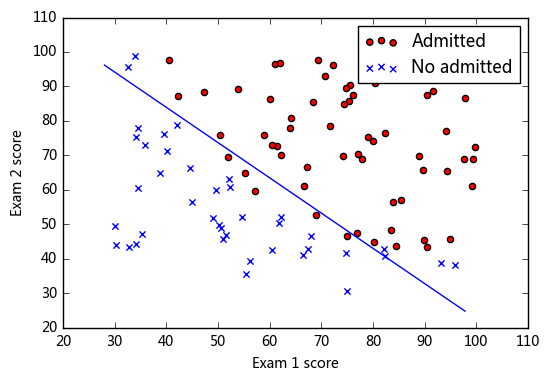

In [212]:
pltboundary(optimal_theta, X, y, data1)

In [25]:
prob = sigmoid(np.array([1,45,85]).dot(optimal_theta))
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((m, 1))
    k = np.where(sigmoid(X.dot(theta)) >= 0.5)[0]
    p[k]= 1
    return p
p = predict(optimal_theta, X)
acc = (p==y).mean()
print(acc)

NameError: name 'optimal_theta' is not defined

In [2]:
data2 = np.loadtxt('ex2data2.txt', delimiter=',')


In [3]:
X2_no1 = data2[:, 0:2]
#X2 = np.c_[np.ones((X2_no1.shape[0], 1)), X2_no1]
y2 = data2[:, 2:]

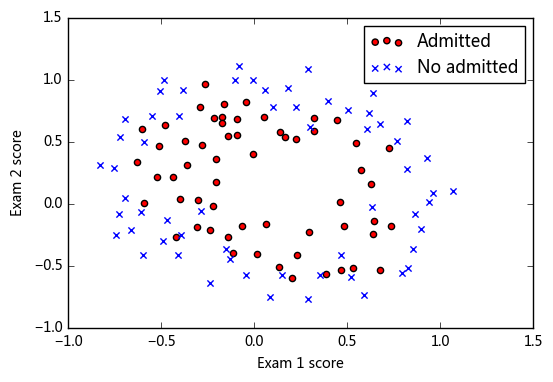

In [6]:
ax2=pltdata(data2)
plt.show()

In [41]:
def mapFeature(x1, x2):
    degree = 7
    out = np.ones((x1.shape[0], 1))
    #print(out.shape)
    for i in range(1,degree):
        for j in range(0,i+1):
            newColumn = (x1 ** (i-j))*(x2 ** j)
            out = np.c_[(out, newColumn)]
            #print(newColumn.shape)
            #sb = np.c_[(out, newColumn)]
    return out
X2 = mapFeature(X2_no1[:, 0:1], X2_no1[:, 1:2])
initial_theta2 = np.zeros((X2.shape[1], 1))
lamda = 1

In [28]:
def costFunction_re(theta, X2, y2, lamda):
    m = len(y2)
    z = X2.dot(theta)
    h = sigmoid(z)
    #theta_1 = theta[:,:]
    #theta_1[0, 0]=0
    #print(theta_1.shape)
    J = 1/m*(-y2.T.dot(np.log(h))-((1-y2).T).dot(np.log(1-h)))+lamda/(2*m)*(theta.T).dot(theta)
    return J


In [33]:
cost2 = costFunction_re(initial_theta2, X2, y2, lamda)
cost2

array([[ 0.69314718]])

In [42]:
result2 = op.minimize(fun=costFunction_re, x0=initial_theta2, args=(X2, y2, lamda), method='TNC')#, jac=gradent)
optimal_theta2 = result2.x
optimal_theta2

array([  1.06796820e+00,   5.77104985e-01,   1.17694721e+00,
        -1.65355200e+00,  -8.90390579e-01,  -1.24725500e+00,
         8.62585767e-02,  -4.73407009e-01,  -2.56263235e-01,
        -1.64962905e-01,  -1.36303596e+00,   8.22395092e-02,
        -6.71433615e-01,  -2.86919756e-01,  -1.15807299e+00,
        -2.67859544e-01,  -2.42068674e-01,  -4.27630125e-02,
        -3.41262741e-01,  -1.32294950e-01,  -4.57810990e-01,
        -1.13151511e+00,  -2.23725066e-02,  -3.87114117e-01,
         7.64743921e-04,  -2.75283351e-01,  -2.03753030e-01,
        -9.25206804e-01])

C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


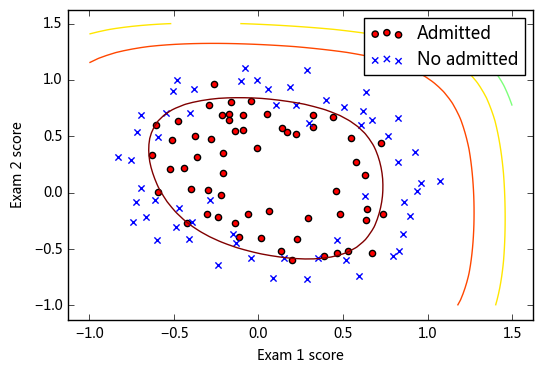

In [43]:
pltboundary(optimal_theta2, X2, y2, data2)


In [44]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((m, 1))
    k = np.where(sigmoid(X.dot(theta)) >= 0.5)[0]
    p[k]= 1
    return p
p2 = predict(optimal_theta2, X2)
acc = (p2==y2).mean()
print(acc)

0.830508474576


In [47]:
optimal_theta2

array([  1.06796820e+00,   5.77104985e-01,   1.17694721e+00,
        -1.65355200e+00,  -8.90390579e-01,  -1.24725500e+00,
         8.62585767e-02,  -4.73407009e-01,  -2.56263235e-01,
        -1.64962905e-01,  -1.36303596e+00,   8.22395092e-02,
        -6.71433615e-01,  -2.86919756e-01,  -1.15807299e+00,
        -2.67859544e-01,  -2.42068674e-01,  -4.27630125e-02,
        -3.41262741e-01,  -1.32294950e-01,  -4.57810990e-01,
        -1.13151511e+00,  -2.23725066e-02,  -3.87114117e-01,
         7.64743921e-04,  -2.75283351e-01,  -2.03753030e-01,
        -9.25206804e-01])